In [789]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


data_info = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')
data_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
data_budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz') 
data_reviews = pd.read_csv('data/zippedData/rotten_tomatoes_critic_reviews.csv.gz')
data_movies = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')


# Observing the different tables. 

**Considering movie information, budget, and reviews to understand what their data represents.**

In [2]:
data_movies.head(2)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [3]:
data_budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [4]:
new_movie = data_info.loc[:,('movie_title','critics_consensus','actors','production_company','tomatometer_status','tomatometer_rating','audience_rating','tomatometer_rotten_critics_count')]

new_movie.head(1)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76


In [5]:
data_ratings.head(2)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [6]:
data_reviews.head(2)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."


# Organizing & Cleaning Data

In [7]:
movie_overview= pd.merge(new_movie,data_budgets,how='inner',left_on='movie_title',right_on='movie')

In [566]:
movie_overview2 = pd.merge(movie_overview,data_movies, how='inner', left_on='movie_title',right_on='title')
movie_overview_columnDrop = movie_overview2.drop(['domestic_gross','movie','genre_ids','original_title','title','original_language','release_date_x','id_x'], axis = 1)
movie_overview_columnDrop.head(2)


,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81


In [ ]:
movie_overview_dropDuplicates['worldwide_gross']= movie_overview_dropDuplicates['worldwide_gross'].str.replace('$','').str.replace(',','')
movie_overview_dropDuplicates['production_budget']= movie_overview_dropDuplicates['production_budget'].str.replace('$','').str.replace(',','')


In [708]:
example = movie_overview_columnDrop.copy()       #reason to create a shallow copy?
example.actors = example.actors.str.split(',')

In [709]:
example.head(2)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"[Logan Lerman, Brandon T. Jackson, Alexandra...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"[Catherine Keener, Amanda Peet, Oliver Platt...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81


## Drop Null Values  - if present 

1. **Observation:**

            Checking how many null values are present.

In [15]:
movie_overview_columnDrop.isnull().sum()

movie_title                           0
critics_consensus                   429
actors                               10
production_company                   18
tomatometer_status                    0
tomatometer_rating                    0
audience_rating                       5
tomatometer_rotten_critics_count      0
production_budget                     0
worldwide_gross                       0
id_y                                  0
popularity                            0
release_date_y                        0
vote_average                          0
vote_count                            0
dtype: int64

2. **Sanity Check:**

           Double checking to ensure that we are not removing more that roughly 1% of our tables when removing 
           duplicates.

In [16]:
cellTotal = np.product(movie_overview_columnDrop.shape)

missing_values_count = movie_overview_columnDrop.isnull().sum()
total_missing = missing_values_count.sum()


percent_missing = (total_missing/cellTotal) * 100
print(percent_missing)

1.232


3. **Remove Rows With Empty Values:**

In [17]:
movie_overview_columnDrop

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81
2,Criminal,"If you saw Nine Queens, it may feel redundant,...","John C. Reilly, Diego Luna, Maggie Gyllenhaal,...",Warner Bros. Pictures,Fresh,69.0,57.0,39,"$31,500,000","$38,771,262",302156,13.651,2016-04-15,5.9,897
3,Criminal,Despite the valiant efforts of a game and tale...,"Kevin Costner, Gary Oldman, Tommy Lee Jones, R...",Summit Entertainment,Rotten,30.0,47.0,94,"$31,500,000","$38,771,262",302156,13.651,2016-04-15,5.9,897
4,Going the Distance,NaN,"Christopher Jacot, Shawn Roberts, Ryan Bellevi...",Séville Pictures,Rotten,0.0,61.0,5,"$32,000,000","$43,603,990",38073,8.281,2010-09-03,6.0,394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Zodiac,"A quiet, dialogue-driven thriller that deliver...","Jake Gyllenhaal, Mark Ruffalo, Robert Downey J...",Paramount Pictures,Certified-Fresh,89.0,77.0,28,"$85,000,000","$83,080,084",285135,4.180,2014-08-16,3.8,49
2496,Zookeeper,Zookeeper smothers Kevin James's with a sodden...,"Kevin James, Rosario Dawson, Ken Jeong, Leslie...",Columbia Pictures,Rotten,14.0,41.0,114,"$80,000,000","$170,805,525",38317,10.764,2011-07-08,5.3,886
2497,Zoolander 2,Zoolander No. 2 has more celebrity cameos than...,"Ben Stiller, Owen Wilson, Will Ferrell, Penelo...",Paramount Pictures,Rotten,22.0,20.0,181,"$50,000,000","$55,348,693",329833,12.997,2016-02-12,4.7,1374
2498,Zoom,Lacking the punch and good cheer of The Incred...,"Tim Allen, Courteney Cox, Chevy Chase, Spencer...",Sony Pictures Entertainment,Rotten,4.0,33.0,65,"$35,000,000","$12,506,188",351065,3.434,2016-09-02,5.5,43


In [18]:
movie_overview_dropNull = movie_overview_columnDrop.dropna()
movie_overview_dropNull

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81
2,Criminal,"If you saw Nine Queens, it may feel redundant,...","John C. Reilly, Diego Luna, Maggie Gyllenhaal,...",Warner Bros. Pictures,Fresh,69.0,57.0,39,"$31,500,000","$38,771,262",302156,13.651,2016-04-15,5.9,897
3,Criminal,Despite the valiant efforts of a game and tale...,"Kevin Costner, Gary Oldman, Tommy Lee Jones, R...",Summit Entertainment,Rotten,30.0,47.0,94,"$31,500,000","$38,771,262",302156,13.651,2016-04-15,5.9,897
5,Going the Distance,It's timelier and a little more honest than mo...,"Drew Barrymore, Justin Long, Charlie Day, Jaso...",New Line Cinema,Rotten,54.0,52.0,77,"$32,000,000","$43,603,990",38073,8.281,2010-09-03,6.0,394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Zodiac,"A quiet, dialogue-driven thriller that deliver...","Jake Gyllenhaal, Mark Ruffalo, Robert Downey J...",Paramount Pictures,Certified-Fresh,89.0,77.0,28,"$85,000,000","$83,080,084",285135,4.180,2014-08-16,3.8,49
2496,Zookeeper,Zookeeper smothers Kevin James's with a sodden...,"Kevin James, Rosario Dawson, Ken Jeong, Leslie...",Columbia Pictures,Rotten,14.0,41.0,114,"$80,000,000","$170,805,525",38317,10.764,2011-07-08,5.3,886
2497,Zoolander 2,Zoolander No. 2 has more celebrity cameos than...,"Ben Stiller, Owen Wilson, Will Ferrell, Penelo...",Paramount Pictures,Rotten,22.0,20.0,181,"$50,000,000","$55,348,693",329833,12.997,2016-02-12,4.7,1374
2498,Zoom,Lacking the punch and good cheer of The Incred...,"Tim Allen, Courteney Cox, Chevy Chase, Spencer...",Sony Pictures Entertainment,Rotten,4.0,33.0,65,"$35,000,000","$12,506,188",351065,3.434,2016-09-02,5.5,43


## Drop duplicate values - if present 

In [19]:
movie_overview_dropDuplicates = movie_overview_dropNull.drop_duplicates(subset=['movie_title'], keep='last')

Again ensuring that there are no rows without information present

In [20]:
movie_overview_dropDuplicates.isnull().sum()

movie_title                         0
critics_consensus                   0
actors                              0
production_company                  0
tomatometer_status                  0
tomatometer_rating                  0
audience_rating                     0
tomatometer_rotten_critics_count    0
production_budget                   0
worldwide_gross                     0
id_y                                0
popularity                          0
release_date_y                      0
vote_average                        0
vote_count                          0
dtype: int64

# Checking Company and Budget

In [21]:
movie_overview_dropDuplicates.head(3)

,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,"$95,000,000","$223,050,874",32657,26.691,2010-02-11,6.1,4229
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,"$3,000,000","$4,570,178",40247,5.945,2010-01-22,6.3,81
3,Criminal,Despite the valiant efforts of a game and tale...,"Kevin Costner, Gary Oldman, Tommy Lee Jones, R...",Summit Entertainment,Rotten,30.0,47.0,94,"$31,500,000","$38,771,262",302156,13.651,2016-04-15,5.9,897


**Data Cleaning: Remove**

Taking dollar signs and commas out of the wide gross and production columns to ensure that they can be divided as integers and or floats.


In [724]:
movie_overview_dropDuplicates['worldwide_gross']= movie_overview_dropDuplicates['worldwide_gross'].str.replace('$','').str.replace(',','')
movie_overview_dropDuplicates['production_budget']= movie_overview_dropDuplicates['production_budget'].str.replace('$','').str.replace(',','')


AttributeError: Can only use .str accessor with string values!

In [725]:
movie_overview_dropDuplicates.worldwide_gross = movie_overview_dropDuplicates.worldwide_gross.astype(int)
movie_overview_dropDuplicates.production_budget = movie_overview_dropDuplicates.production_budget.astype(int)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# Isolating Values to Determine Movie Success


## Adding a New Profit Column, Isolating Columns, and Cleaning Actor Data


### Creating a New Profit Column /  Isolating Columns

1. **Added new profit column.**

In [726]:
budget_frame['movie_profit'] = budget_frame.worldwide_gross - budget_frame.production_budget
budget_frame


,movie_title,critics_consensus,actors,production_company,tomatometer_status,tomatometer_rating,audience_rating,tomatometer_rotten_critics_count,production_budget,worldwide_gross,id_y,popularity,release_date_y,vote_average,vote_count,logged_budget,movie_profit
0,Percy Jackson & the Olympians: The Lightning T...,Though it may seem like just another Harry Pot...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",20th Century Fox,Rotten,49.0,53.0,76,95000000,223050874,32657,26.691,2010-02-11,6.1,4229,18.369387,128050874
1,Please Give,Nicole Holofcener's newest might seem slight i...,"Catherine Keener, Amanda Peet, Oliver Platt, R...",Sony Pictures Classics,Certified-Fresh,87.0,64.0,19,3000000,4570178,40247,5.945,2010-01-22,6.3,81,14.914123,1570178
3,Criminal,Despite the valiant efforts of a game and tale...,"Kevin Costner, Gary Oldman, Tommy Lee Jones, R...",Summit Entertainment,Rotten,30.0,47.0,94,31500000,38771262,302156,13.651,2016-04-15,5.9,897,17.265498,7271262
5,Going the Distance,It's timelier and a little more honest than mo...,"Drew Barrymore, Justin Long, Charlie Day, Jaso...",New Line Cinema,Rotten,54.0,52.0,77,32000000,43603990,38073,8.281,2010-09-03,6.0,394,17.281246,11603990
9,Moonlight,Moonlight uses one man's story to offer a rema...,"Naomie Harris, André Holland, Mahershala Ali, ...",A24 Films,Certified-Fresh,98.0,79.0,7,1500000,65245512,376867,15.948,2016-10-21,7.4,3893,14.220976,63745512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Zodiac,"A quiet, dialogue-driven thriller that deliver...","Jake Gyllenhaal, Mark Ruffalo, Robert Downey J...",Paramount Pictures,Certified-Fresh,89.0,77.0,28,85000000,83080084,285135,4.180,2014-08-16,3.8,49,18.258162,-1919916
2496,Zookeeper,Zookeeper smothers Kevin James's with a sodden...,"Kevin James, Rosario Dawson, Ken Jeong, Leslie...",Columbia Pictures,Rotten,14.0,41.0,114,80000000,170805525,38317,10.764,2011-07-08,5.3,886,18.197537,90805525
2497,Zoolander 2,Zoolander No. 2 has more celebrity cameos than...,"Ben Stiller, Owen Wilson, Will Ferrell, Penelo...",Paramount Pictures,Rotten,22.0,20.0,181,50000000,55348693,329833,12.997,2016-02-12,4.7,1374,17.727534,5348693
2498,Zoom,Lacking the punch and good cheer of The Incred...,"Tim Allen, Courteney Cox, Chevy Chase, Spencer...",Sony Pictures Entertainment,Rotten,4.0,33.0,65,35000000,12506188,351065,3.434,2016-09-02,5.5,43,17.370859,-22493812


2. **Creating a new data frame containing our targeted values (columns).**

In [727]:
# isolating columns to study movie success more in depth 
movie_actor_budget = budget_frame[['movie_title','actors','tomatometer_status','tomatometer_rating','movie_profit','production_budget']].sort_values(by='production_budget', ascending = False)
                            
movie_actor_budget.reset_index(level=0, inplace=True)


In [728]:
movie_actor_budget = movie_actor_budget.drop(['index'], axis = 1)

In [729]:
movie_actor_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         1388 non-null   object 
 1   actors              1388 non-null   object 
 2   tomatometer_status  1388 non-null   object 
 3   tomatometer_rating  1388 non-null   float64
 4   movie_profit        1388 non-null   int64  
 5   production_budget   1388 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 65.2+ KB


### Actors Cleaning 

1. **Break actor column into a list**


In [730]:
first300 = movie_actor_budget.copy()       #reason to create a shallow copy?
first300.actors = first300.actors.str.split(',') #place each actor into a new list sepparated by commas
first300

,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
0,Avengers: Age of Ultron,"[Robert Downey Jr., Chris Evans, Mark Ruffal...",Certified-Fresh,76.0,1072413963,330600000
1,Avengers: Infinity War,"[Robert Downey Jr., Chris Hemsworth, Mark Ru...",Certified-Fresh,85.0,1748134200,300000000
2,Justice League,"[Ben Affleck, Henry Cavill, Amy Adams, Gal ...",Rotten,40.0,355945209,300000000
3,Spectre,"[Daniel Craig, Christoph Waltz, Naomie Harri...",Fresh,63.0,579620923,300000000
4,Solo: A Star Wars Story,"[Alden Ehrenreich, Joonas Suotamo, Woody Har...",Fresh,70.0,118151347,275000000
...,...,...,...,...,...,...
1383,Da Sweet Blood of Jesus,"[Elvis Nolasco, Stephen Tyrone Williams, Zar...",Rotten,47.0,-1250000,1250000
1384,Dear White People,"[Tyler James Williams, Tessa Thompson, Brand...",Certified-Fresh,91.0,4153771,1250000
1385,Airborne,"[Shane McDermott, Seth Green, Brittney Powel...",Rotten,21.0,-1200000,1200000
1386,Saw,"[Leigh Whannell, Cary Elwes, Danny Glover, ...",Rotten,49.0,102680027,1200000


2. **Take duplicate names of Jr. out of the new list of actors**

In [731]:
def fix_jr(list_of_names):
    new_list = []
    new_list_index = 1
    for idx in range(len(list_of_names)): 
        if list_of_names[idx] == ' Jr.':

            new_list[idx-new_list_index] = list_of_names[idx-new_list_index] + list_of_names[idx]   #subtracts old index from new
            new_list_index += 1                                                                     #b/c the list indexes are not(==)
            continue 
                            
        new_list.append(list_of_names[idx])
    return new_list


3. **Applying function on an actor column**

In [732]:
first300['actors'] = first300.actors.apply(fix_jr)

4. (Part 1) **Code check to ensure that we are able to remove any stand alone "jr's" from the data frame**

In [733]:
first300.iloc[error].actors[0]

['Robert Downey Jr.',
 ' Chris Evans',
 ' Mark Ruffalo',
 ' Chris Hemsworth',
 ' Linda Cardellini',
 ' Scarlett Johansson',
 ' Jeremy Renner',
 ' Samuel L. Jackson',
 ' James Spader',
 ' Elizabeth Olsen',
 ' Aaron Taylor-Johnson',
 ' Thomas Kretschmann',
 ' Paul Bettany',
 ' Tom Hiddleston',
 ' Stellan Skarsgård',
 ' Cobie Smulders',
 ' Don Cheadle',
 ' Anthony Mackie',
 ' Hayley Atwell',
 ' Idris Elba',
 ' Claudia Kim',
 ' Andy Serkis',
 ' Julie Delpy',
 ' Stan Lee',
 ' Henry Goodman',
 ' Chris Luca',
 ' Brian Schaeffer',
 ' Dominique Provost-Chalkley',
 ' Isaac Andrews',
 ' Gareth Kieran Jones',
 ' Chan Woo Lim',
 ' Minhee Yeo',
 ' Bentley Kalu',
 ' Julian Bleach',
 ' Vuyo Dabula',
 ' Nondumiso Tembe',
 ' Kabelo Thai',
 ' Lele Ledwaba',
 ' Mandla Gaduka',
 ' Harriet Manamela',
 ' Antony Acheampong',
 ' Chioma Anyanwu',
 ' Ingvild Deila',
 ' Earl Kim Shiroma',
 ' Michael Matovski',
 ' Alma Noce',
 ' Riccardo Richetta',
 ' Earl Kim',
 ' Constanza Ruff',
 ' Monty McLaren',
 ' Julia Kryn

3. (Part 2) **Code check to ensure that stand alone "jr's" have been removed**

In [734]:
duplicateRowsDF = new300[new300.duplicated('actors')]

#to check ALL ROWS -> might not be necissary 
duplicateRowsDF['actors'].value_counts().head(10)

 Joe Chrest           20
 Michael Peña         20
 Anthony Mackie       18
 Stanley Tucci        18
 Woody Harrelson      16
 Morgan Freeman       16
 Samuel L. Jackson    15
 Ken Jeong            15
 J.K. Simmons         15
 John Goodman         15
Name: actors, dtype: int64

4. **Place actors into separate rows.**

    **We are doing to record the number of each actors occurances within the top 300 profitable movies**

In [735]:
new300 = first300.explode('actors') #Place each actor into their own individual row
new300


,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
0,Avengers: Age of Ultron,Robert Downey Jr.,Certified-Fresh,76.0,1072413963,330600000
0,Avengers: Age of Ultron,Chris Evans,Certified-Fresh,76.0,1072413963,330600000
0,Avengers: Age of Ultron,Mark Ruffalo,Certified-Fresh,76.0,1072413963,330600000
0,Avengers: Age of Ultron,Chris Hemsworth,Certified-Fresh,76.0,1072413963,330600000
0,Avengers: Age of Ultron,Linda Cardellini,Certified-Fresh,76.0,1072413963,330600000
...,...,...,...,...,...,...
1387,The Fog,Tommy Lee Wallace,Certified-Fresh,74.0,20345820,1100000
1387,The Fog,Laurie Arent,Certified-Fresh,74.0,20345820,1100000
1387,The Fog,Lindsey Arent,Certified-Fresh,74.0,20345820,1100000
1387,The Fog,Shari Jacoby,Certified-Fresh,74.0,20345820,1100000


## Breaking 300 movies with highest budgets into 3 sets of 100 to determine...
   * **What movies have been the most successful by finding:** 
           +Tomatometer Rating
           +Total Profit 
    
   * **Actors appearances in the most popular movies** 
    
   * **Companies who commonly produced the most successful movies.**

1. **Code Check: Viewing Our Data Frame**

In [736]:
new300

,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
0,Avengers: Age of Ultron,Robert Downey Jr.,Certified-Fresh,76.0,1072413963,330600000
0,Avengers: Age of Ultron,Chris Evans,Certified-Fresh,76.0,1072413963,330600000
0,Avengers: Age of Ultron,Mark Ruffalo,Certified-Fresh,76.0,1072413963,330600000
0,Avengers: Age of Ultron,Chris Hemsworth,Certified-Fresh,76.0,1072413963,330600000
0,Avengers: Age of Ultron,Linda Cardellini,Certified-Fresh,76.0,1072413963,330600000
...,...,...,...,...,...,...
1387,The Fog,Tommy Lee Wallace,Certified-Fresh,74.0,20345820,1100000
1387,The Fog,Laurie Arent,Certified-Fresh,74.0,20345820,1100000
1387,The Fog,Lindsey Arent,Certified-Fresh,74.0,20345820,1100000
1387,The Fog,Shari Jacoby,Certified-Fresh,74.0,20345820,1100000


**Visualizing the upper and lower threshold**

<ipython-input-757-7413c29a9ef4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['logged_profit'] = np.log(frame.movie_profit)   #finding the log of the movie profits


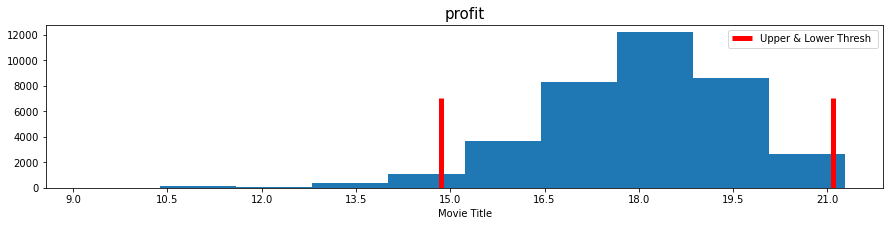

In [757]:

fig, ax = plt.subplots(figsize=(15,3))


frame = new300[new300.movie_profit > 0]

frame['logged_profit'] = np.log(frame.movie_profit)   #finding the log of the movie profits

ax.hist(frame.logged_profit)
upper_thresh = frame.logged_profit.mean() + frame.logged_profit.std() * 2
lower_thresh = frame.logged_profit.mean() - frame.logged_profit.std() * 2
ax.vlines(lower_thresh, ymin=0, ymax=7000, lw=5, color='red')
ax.vlines(upper_thresh, ymin=0, ymax=7000, lw=5, color='red')

# Add labels for x and y axes
ax.set_xlabel('Movie Title')


# Add a title for the plot
ax.set_title('profit', fontsize=15)

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
# add a legend 
ax.legend(["Upper & Lower Thresh "], loc=1);




In [758]:
new300

,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
0,Avengers: Age of Ultron,Robert Downey Jr.,Certified-Fresh,76.0,1072413963,330600000
0,Avengers: Age of Ultron,Chris Evans,Certified-Fresh,76.0,1072413963,330600000
0,Avengers: Age of Ultron,Mark Ruffalo,Certified-Fresh,76.0,1072413963,330600000
0,Avengers: Age of Ultron,Chris Hemsworth,Certified-Fresh,76.0,1072413963,330600000
0,Avengers: Age of Ultron,Linda Cardellini,Certified-Fresh,76.0,1072413963,330600000
...,...,...,...,...,...,...
1387,The Fog,Tommy Lee Wallace,Certified-Fresh,74.0,20345820,1100000
1387,The Fog,Laurie Arent,Certified-Fresh,74.0,20345820,1100000
1387,The Fog,Lindsey Arent,Certified-Fresh,74.0,20345820,1100000
1387,The Fog,Shari Jacoby,Certified-Fresh,74.0,20345820,1100000


### Profit and Actor

1. **Finding Relationship Between Actors and Profit**

**Isolate actors who have been in 10 or more movies.**

In [776]:
a_list_actors = drop_outliers.actors.value_counts()  #index = 65 
a_list_actors

 Michael Peña        18
 Morgan Freeman      17
 Joe Chrest          17
 Anthony Mackie      16
 Ken Jeong           16
                     ..
 Bunny May            1
 Gary Wayne Loper     1
 Aaron Flanders       1
 Matt Lanter          1
 Anthony Ferretti     1
Name: actors, Length: 25502, dtype: int64

In [741]:
a_list_actors = list(a_list_actors[a_list_actors >= 10].index)

In [772]:
top10_list_actors = drop_outliers[drop_outliers.actors.isin(a_list_actors)]
top10_list_actors

,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
0,Avengers: Age of Ultron,Scarlett Johansson,Certified-Fresh,76.0,1072413963,330600000
0,Avengers: Age of Ultron,Samuel L. Jackson,Certified-Fresh,76.0,1072413963,330600000
0,Avengers: Age of Ultron,Anthony Mackie,Certified-Fresh,76.0,1072413963,330600000
0,Avengers: Age of Ultron,Idris Elba,Certified-Fresh,76.0,1072413963,330600000
0,Avengers: Age of Ultron,Stan Lee,Certified-Fresh,76.0,1072413963,330600000
...,...,...,...,...,...,...
1343,Inside Job,Matt Damon,Certified-Fresh,98.0,5799257,2000000
1348,Winter's Bone,Jennifer Lawrence,Certified-Fresh,94.0,14131551,2000000
1352,We Are Your Friends,Jon Bernthal,Rotten,38.0,8153415,2000000
1363,Carrie,Judy Greer,Rotten,50.0,24078153,1800000


1. **Finding Relationship Between Profit and Rating**

In [784]:
# top10_list_actors[top10_list_actors.columns[:10].tolist() + ['movie_profit']].corr().sort_values('movie_profit', ascending=False)



top10_list_actors.corr()

,tomatometer_rating,movie_profit,production_budget
tomatometer_rating,1.000000,0.286548,0.136201
movie_profit,0.286548,1.000000,0.706136
production_budget,0.136201,0.706136,1.000000


In [791]:
prof_budget = top10_list_actors.sort_values(by=['movie_profit','tomatometer_rating'], ascending=False).head(20)
prof_budget

,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
20,Jurassic World,Vincent D'Onofrio,Fresh,70.0,1433854864,215000000
20,Jurassic World,Judy Greer,Fresh,70.0,1433854864,215000000
20,Jurassic World,Michael Papajohn,Fresh,70.0,1433854864,215000000
33,Black Panther,Stan Lee,Certified-Fresh,96.0,1148258224,200000000
100,Frozen,Alan Tudyk,Certified-Fresh,90.0,1122469910,150000000
267,Minions,Allison Janney,Rotten,55.0,1086336173,74000000
267,Minions,Steve Coogan,Rotten,55.0,1086336173,74000000
0,Avengers: Age of Ultron,Scarlett Johansson,Certified-Fresh,76.0,1072413963,330600000
0,Avengers: Age of Ultron,Samuel L. Jackson,Certified-Fresh,76.0,1072413963,330600000
0,Avengers: Age of Ultron,Anthony Mackie,Certified-Fresh,76.0,1072413963,330600000


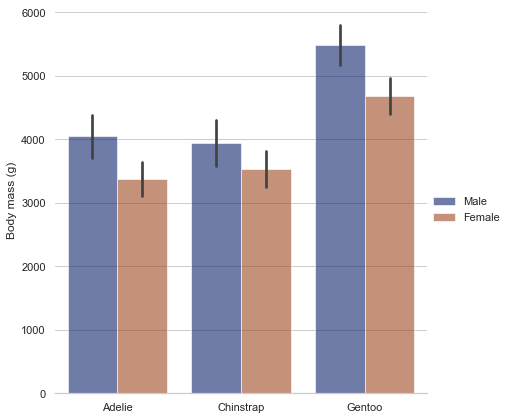

In [797]:
import seaborn as sns
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

In [788]:
top10_list_actors.sort_values(by=['movie_profit','tomatometer_rating'], ascending=False).tail(20)

,movie_title,actors,tomatometer_status,tomatometer_rating,movie_profit,production_budget
643,Steve Jobs,Seth Rogen,Certified-Fresh,85.0,5579007,30000000
428,Zoolander 2,Benedict Cumberbatch,Rotten,22.0,5348693,50000000
428,Zoolander 2,Kristen Wiig,Rotten,22.0,5348693,50000000
428,Zoolander 2,Olivia Munn,Rotten,22.0,5348693,50000000
428,Zoolander 2,Fred Armisen,Rotten,22.0,5348693,50000000
708,The Losers,Idris Elba,Rotten,48.0,4863840,25000000
717,Draft Day,Terry Crews,Rotten,59.0,4847480,25000000
309,The Kid,Chris Pratt,Rotten,45.0,4688384,65000000
309,The Kid,Vincent D'Onofrio,Rotten,45.0,4688384,65000000
461,Charlie St. Cloud,Dave Franco,Rotten,28.0,4478084,44000000


In [769]:
top10_list_actors.groupby('actors').mean().sort_values('production_budget', ascending = False)

,tomatometer_rating,movie_profit,production_budget
actors,,,
Stan Lee,77.857143,6.514434e+08,1.949000e+08
John Ratzenberger,85.200000,5.006799e+08,1.632500e+08
Idris Elba,71.000000,3.866333e+08,1.385846e+08
Samuel L. Jackson,68.571429,3.623627e+08,1.361143e+08
Michael Caine,59.636364,3.911361e+08,1.278182e+08
...,...,...,...
J.K. Simmons,55.692308,1.045573e+08,4.506154e+07
Dave Franco,63.636364,1.105306e+08,4.218182e+07
Kevin Hart,44.416667,1.514613e+08,4.137500e+07


0       1072413963
0       1072413963
0       1072413963
0       1072413963
0       1072413963
           ...    
1343       5799257
1348      14131551
1352       8153415
1363      24078153
1378      98370886
Name: movie_profit, Length: 748, dtype: int64

In [744]:
drop_outliers.groupby('actors').mean().sort_values('movie_profit', ascending=False)

,tomatometer_rating,movie_profit,production_budget
actors,,,
Timothy Eulich,70.0,1.433855e+09,215000000.0
Kelly Washington,70.0,1.433855e+09,215000000.0
Alan Tam,70.0,1.433855e+09,215000000.0
Bill Ogilvie,70.0,1.433855e+09,215000000.0
Brad Bird,70.0,1.433855e+09,215000000.0
...,...,...,...
Kick Gurry,27.0,2.982519e+06,179000000.0
Tim Pigott-Smith,27.0,2.982519e+06,179000000.0
Sean Baker,27.0,2.982519e+06,179000000.0


**Vizualization for Comparison**